In [2]:
!pip install mediapipe

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 35.6 MB 4.6 MB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 41.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68.3 MB 3.4 MB/s eta 0:00:012     |██████████████                  | 30.0 MB 2.6 MB/s eta 0:00:15
     |████████████████████████████████| 1.0 MB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 71.6 MB 58.7 MB/s eta 0:00:011
     |████████████████████████████████| 1.0 MB 93.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 48.7 MB/s eta 0:00:01
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518704 sha256=1a1e42e0e2bae8d9d2d016e694d234571126644cdd4501c7f4ef7fc7ff9b159e
  Stored in directory: /root/.cache/pip/wheels/30/31/7a/6c69f802564fc7b5e31d500f6fb7b78f4027b7e418e37e3c20
Successf

In [3]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
     for hand_landmarks in results.multi_hand_landmarks:
         mp_drawing.draw_landmarks(
             image, hand_landmarks)
         for idx, landmark in enumerate(hand_landmarks.landmark):
             print(f"Landmark {idx + 1}: x={landmark.x}, y={landmark.y}, z={landmark.z}")

# 保存处理后的图像到文件
cv2.imwrite('output_image.jpg', image)


Landmark 1: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06
Landmark 2: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787
Landmark 3: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884
Landmark 4: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023
Landmark 5: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007
Landmark 6: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726
Landmark 7: x=0.6224612593650818, y=0.32865941524505615, z=-0.08969682455062866
Landmark 8: x=0.6575682759284973, y=0.23685653507709503, z=-0.11669182032346725
Landmark 9: x=0.6797264218330383, y=0.161033034324646, z=-0.1382618248462677
Landmark 10: x=0.465442419052124, y=0.4530300796031952, z=-0.057180702686309814
Landmark 11: x=0.4781588912010193, y=0.29041600227355957, z=-0.08992395550012589
Landmark 12: x=0.4804042875766754, y=0.18361783027648926, z=-0.11966921389102936
Landmark 13: x=0.47522926330566406, y=0.0938

True

In [5]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

# 保存处理后的图像到文件
cv2.imwrite('output_image.jpg', image)


True

In [8]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算手部关键点中心坐标
    landmarks_array = np.array([[landmark.x * image.shape[1], landmark.y * image.shape[0]] 
                                 for landmark in hand_landmarks.landmark])
    center_x = int(np.mean(landmarks_array[:, 0]))
    center_y = int(np.mean(landmarks_array[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)

# 保存处理后的图像到文件
cv2.imwrite('output2_image.jpg', image)


True

In [9]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算手部关键点中心坐标
    center_landmarks_indices = [1, 2, 3, 6, 10, 14, 18]
    center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1], 
                                  hand_landmarks.landmark[i - 1].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
 
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)

# 保存处理后的图像到文件
cv2.imwrite('output3_image.jpg', image)


True

In [11]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算手部关键点中心坐标
    center_landmarks_indices = [1, 2, 3, 6, 10, 14, 18]  
    center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1], 
                                  hand_landmarks.landmark[i - 1].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)

# 保存处理后的图像到文件
cv2.imwrite('output4_image.jpg', image)


True

In [12]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算1、2、6、10、14、18这些关键点的坐标平均值
    center_landmarks_indices = [1, 2, 6, 10, 14, 18]  
    center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1], 
                                  hand_landmarks.landmark[i - 1].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)

# 保存处理后的图像到文件
cv2.imwrite('output5_image.jpg', image)


True

In [15]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算1、2、6、10、14、18这些关键点的坐标平均值
    center_landmarks_indices = [1, 2, 6, 10, 14, 18]  
    center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1], 
                                  hand_landmarks.landmark[i - 1].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    



# 保存处理后的图像到文件
cv2.imwrite('output7_image.jpg', image)


True

In [16]:
import numpy as np

In [17]:
train = np.load("class14/test_ntus.npy")

In [18]:
train.shape

(840, 153, 22, 6)

In [19]:
import numpy as np

train = np.load("class14/test_ntus.npy")
print(train[0])


[[[ 4.7055387e-01 -3.7932444e-01  6.2553102e-01  5.2999854e-03
    3.8764477e-03 -3.1530261e-03]
  [ 4.5131218e-01 -3.2403859e-01  5.8998698e-01  7.0436597e-03
    5.3018630e-03 -5.1199794e-03]
  [ 4.4839582e-01 -3.5335639e-01  6.1529797e-01  7.2409809e-03
    1.9922554e-03  4.0054321e-05]
  ...
  [ 4.7312981e-01 -2.4857411e-01  5.4245102e-01 -8.6620152e-03
   -1.6572267e-02 -1.4116049e-02]
  [ 4.5517832e-01 -2.4925247e-01  5.2633899e-01 -1.8581420e-02
   -2.1463484e-02 -1.3930023e-02]
  [ 4.3772182e-01 -2.5274408e-01  5.1212198e-01 -2.5208324e-02
   -2.2389472e-02 -1.3764977e-02]]

 [[ 4.7585386e-01 -3.7544799e-01  6.2237799e-01  1.7131269e-03
    2.3255050e-03 -2.4610162e-03]
  [ 4.5835584e-01 -3.1873673e-01  5.8486700e-01  1.0151863e-03
   -1.2958348e-03 -1.8000603e-04]
  [ 4.5563680e-01 -3.5136414e-01  6.1533803e-01  7.6573193e-03
    2.2714436e-03 -1.2890100e-03]
  ...
  [ 4.6446779e-01 -2.6514637e-01  5.2833498e-01 -1.9447982e-02
    1.8501103e-02  2.7520061e-03]
  [ 4.3659690e-0

In [22]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.75,
        min_tracking_confidence=0.75)

image = cv2.imread("hand.jpg")
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算1、2、6、10、14、18这些关键点的z坐标的平均值
    center_landmarks_indices = [1, 2, 6, 10, 14, 18]  
    center_landmarks_z = [hand_landmarks.landmark[i - 1].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算1、2、6、10、14、18这些关键点的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1], 
                                  hand_landmarks.landmark[i - 1].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取22号关键点的坐标
    landmark_22_x = int(center_x)
    landmark_22_y = int(center_y)
    landmark_22_z = center_landmarks_z_avg

    print(f"Point 22: x={landmark_22_x}, y={landmark_22_y}, z={landmark_22_z}")

# 保存处理后的图像到文件
cv2.imwrite('output8_image.jpg', image)


Point 22: x=215, y=276, z=-0.05448034289423731


True

Landmark 0: x=0.43298447132110596, y=0.818928599357605, z=1.3960234355181456e-06, extended_params=[0.43298447132110596, 0.818928599357605, 1.3960234355181456e-06, 0, 0, 0]
Landmark 1: x=0.5768669247627258, y=0.7578548192977905, z=-0.06266549974679947, extended_params=[0.5768669247627258, 0.7578548192977905, -0.06266549974679947, 0, 0, 0]
Landmark 2: x=0.6866133809089661, y=0.6619189381599426, z=-0.09317520260810852, extended_params=[0.6866133809089661, 0.6619189381599426, -0.09317520260810852, 0, 0, 0]
Landmark 3: x=0.7884411811828613, y=0.5874151587486267, z=-0.121174655854702, extended_params=[0.7884411811828613, 0.5874151587486267, -0.121174655854702, 0, 0, 0]
Landmark 4: x=0.8756880164146423, y=0.5577660799026489, z=-0.1499992161989212, extended_params=[0.8756880164146423, 0.5577660799026489, -0.1499992161989212, 0, 0, 0]
Landmark 5: x=0.5583467483520508, y=0.4714517891407013, z=-0.054060522466897964, extended_params=[0.5583467483520508, 0.4714517891407013, -0.054060522466897964, 0

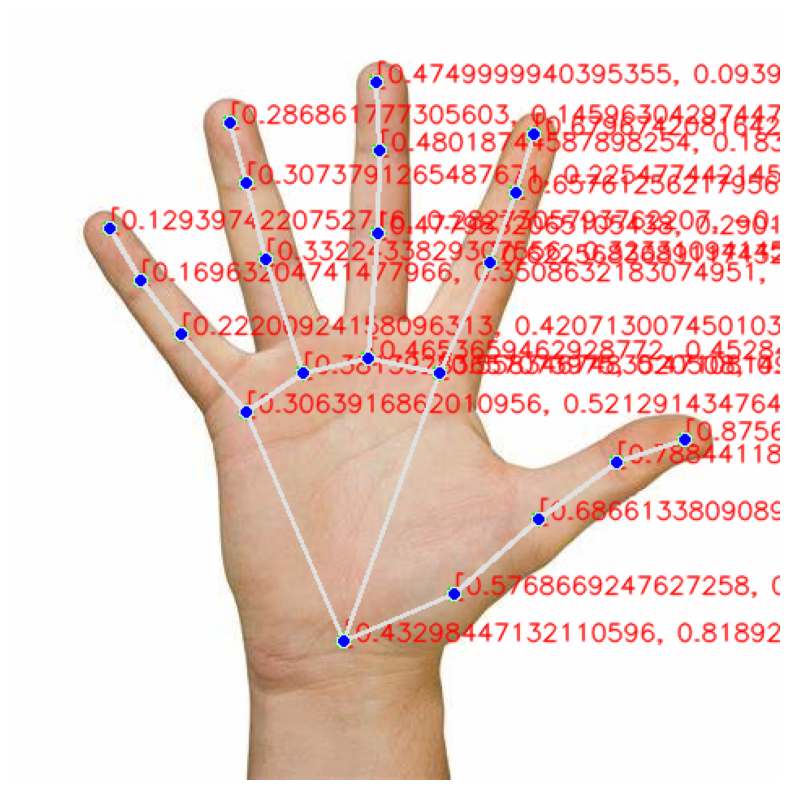

True

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取图像尺寸
            h, w, _ = image.shape

            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 扩展成6个参数
            extended_params = [x, y, z, 0, 0, 0]

            # 打印坐标和扩展后的参数
            print(f'Landmark {idx}: x={x}, y={y}, z={z}, extended_params={extended_params}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 在图像上添加文本，显示扩展后的参数
            cv2.putText(image_rgb, f'{extended_params}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 绘制手部关键点和连接
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


Landmark 0: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06, extended_params=[0.43302443623542786, 0.818848729133606, 1.3965103562441072e-06, 0, 0, 0]
Landmark 1: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787, extended_params=[0.5768869519233704, 0.7579110860824585, -0.06282050162553787, 0, 0, 0]
Landmark 2: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884, extended_params=[0.6866481900215149, 0.6619820594787598, -0.09351545572280884, 0, 0, 0]
Landmark 3: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023, extended_params=[0.7884937524795532, 0.5874353647232056, -0.12168563157320023, 0, 0, 0]
Landmark 4: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007, extended_params=[0.8758532404899597, 0.5577382445335388, -0.15070241689682007, 0, 0, 0]
Landmark 5: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726, extended_params=[0.5583635568618774, 0.47163403034210205, -0.05463092401623

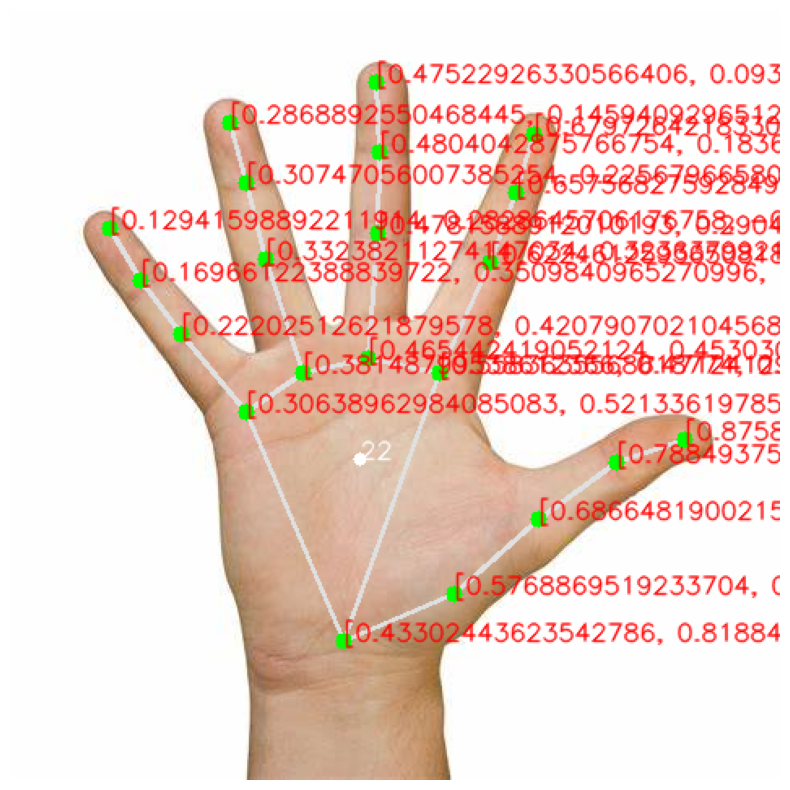

True

In [6]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 在图像上绘制关键点和连接
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取图像尺寸
            h, w, _ = image.shape

            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 打印坐标和扩展后的参数
            extended_params = [x, y, z, 0, 0, 0]
            print(f'Landmark {idx}: x={x}, y={y}, z={z}, extended_params={extended_params}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 在图像上添加文本，显示扩展后的参数
            cv2.putText(image_rgb, f'{extended_params}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 计算1、2、6、10、14、18这些关键点的z坐标的平均值
        center_landmarks_indices = [1, 2, 6, 10, 14, 18]
        center_landmarks_z = [hand_landmarks.landmark[i - 1].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)

        # 计算1、2、6、10、14、18这些关键点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i - 1].x * image.shape[1],
                                      hand_landmarks.landmark[i - 1].y * image.shape[0]]
                                     for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 在图像上标记手部中心点
        cv2.putText(image_rgb, str(22), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制手部中心点
        cv2.circle(image_rgb, (center_x, center_y), 4, (255, 255, 255), -1)

        # 获取22号关键点的坐标
        landmark_22_x = center_x
        landmark_22_y = center_y
        landmark_22_z = center_landmarks_z_avg

        print(f"Point 22: x={landmark_22_x}, y={landmark_22_y}, z={landmark_22_z}")

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


Landmark 1: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06, extended_params=[0.43302443623542786, 0.818848729133606, 1.3965103562441072e-06, 0, 0, 0]
Landmark 2: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787, extended_params=[0.5768869519233704, 0.7579110860824585, -0.06282050162553787, 0, 0, 0]
Landmark 3: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884, extended_params=[0.6866481900215149, 0.6619820594787598, -0.09351545572280884, 0, 0, 0]
Landmark 4: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023, extended_params=[0.7884937524795532, 0.5874353647232056, -0.12168563157320023, 0, 0, 0]
Landmark 5: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007, extended_params=[0.8758532404899597, 0.5577382445335388, -0.15070241689682007, 0, 0, 0]
Landmark 6: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726, extended_params=[0.5583635568618774, 0.47163403034210205, -0.05463092401623

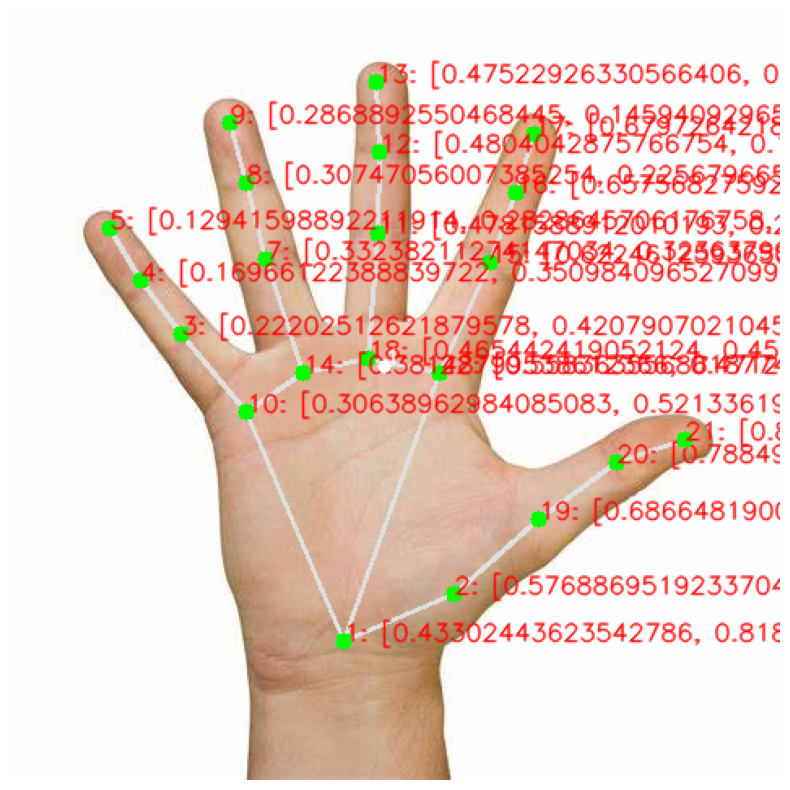

True

In [8]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新1点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,   # 原6点
    7: 16,   # 原7点
    8: 17,   # 原8点
    9: 18,   # 原9点
    10: 11,  # 原10点
    11: 12, # 原11点
    12: 13, # 原12点
    13: 14, # 原13点
    14: 7, # 原14点
    15: 8, # 原15点
    16: 9, # 原16点
    17: 10, # 原17点
    18: 3, # 原18点
    19: 4,  # 原19点变成新2点
    20: 5,  # 原20点变成新3点
    21: 6   # 原21点变成新4点
}

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 在图像上绘制关键点和连接
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取图像尺寸
            h, w, _ = image.shape

            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 打印坐标和扩展后的参数
            extended_params = [x, y, z, 0, 0, 0]
            print(f'Landmark {idx + 1}: x={x}, y={y}, z={z}, extended_params={extended_params}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 获取新的索引
            new_idx = index_mapping.get(idx, idx + 1)  # 默认使用原索引加1
            # 在图像上添加文本，显示扩展后的参数和新的索引
            cv2.putText(image_rgb, f'{new_idx}: {extended_params}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 计算新的1号点的z坐标的平均值
        center_landmarks_indices = [1, 2, 6, 10, 14, 18]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)

        # 计算新的1号点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1],
                                      hand_landmarks.landmark[i].y * image.shape[0]]
                                     for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 在图像上标记新的1号点
        cv2.putText(image_rgb, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制新的1号点
        cv2.circle(image_rgb, (center_x, center_y), 4, (255, 255, 255), -1)

        # 获取新的1号点的坐标
        landmark_1_x = center_x
        landmark_1_y = center_y
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


Landmark 1: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06, extended_params=[0.43302443623542786, 0.818848729133606, 1.3965103562441072e-06, 0, 0, 0]
Landmark 2: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787, extended_params=[0.5768869519233704, 0.7579110860824585, -0.06282050162553787, 0, 0, 0]
Landmark 3: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884, extended_params=[0.6866481900215149, 0.6619820594787598, -0.09351545572280884, 0, 0, 0]
Landmark 4: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023, extended_params=[0.7884937524795532, 0.5874353647232056, -0.12168563157320023, 0, 0, 0]
Landmark 5: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007, extended_params=[0.8758532404899597, 0.5577382445335388, -0.15070241689682007, 0, 0, 0]
Landmark 6: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726, extended_params=[0.5583635568618774, 0.47163403034210205, -0.05463092401623

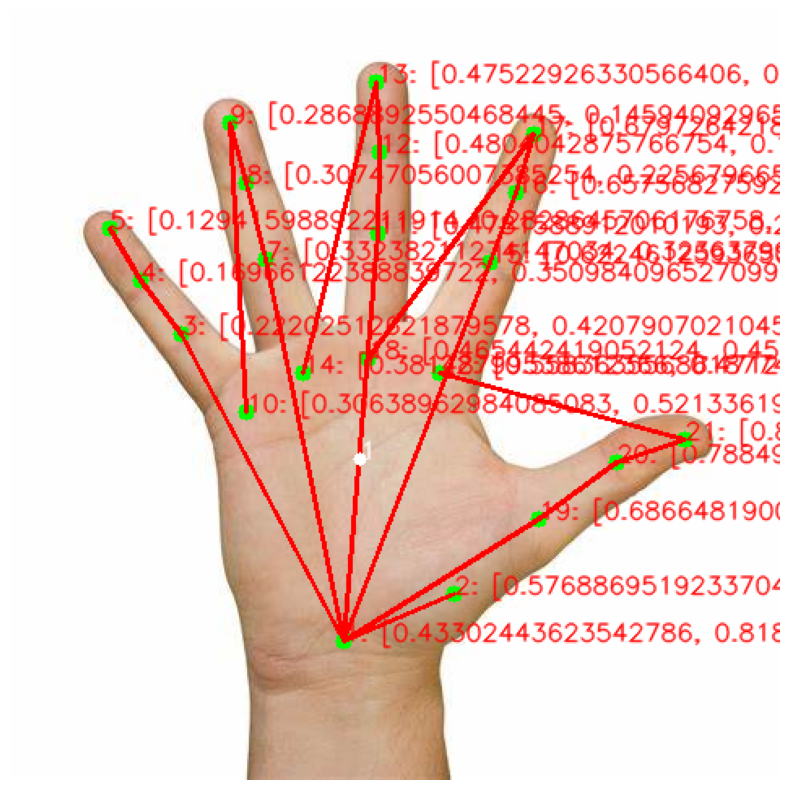

True

In [9]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 创建新的索引映射
index_mapping = {
    0: 1,   # 原1点变成新1点
    1: 2,   # 原2点变成新2点
    2: 19,  # 原3点变成新19点
    3: 20,  # 原4点变成新20点
    4: 21,  # 原5点变成新21点
    5: 22,  # 原6点变成新22点
    6: 15,   # 原7点变成新15点
    7: 16,   # 原8点变成新16点
    8: 17,   # 原9点变成新17点
    9: 18,   # 原10点变成新18点
    10: 11,  # 原11点变成新11点
    11: 12,  # 原12点变成新12点
    12: 13,  # 原13点变成新13点
    13: 14,  # 原14点变成新14点
    14: 7,   # 原15点变成新7点
    15: 8,   # 原16点变成新8点
    16: 9,   # 原17点变成新9点
    17: 10,  # 原18点变成新10点
    18: 3,   # 原19点变成新3点
    19: 4,   # 原20点变成新4点
    20: 5,   # 原21点变成新5点
    21: 6    # 原22点变成新6点
}

# 创建新的连接顺序
connections = [
    (1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制关键点和连接线
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 打印坐标和扩展后的参数
            extended_params = [x, y, z, 0, 0, 0]
            print(f'Landmark {idx + 1}: x={x}, y={y}, z={z}, extended_params={extended_params}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 获取新的索引
            new_idx = index_mapping.get(idx, idx + 1)  # 默认使用原索引加1
            # 在图像上添加文本，显示扩展后的参数和新的索引
            cv2.putText(image_rgb, f'{new_idx}: {extended_params}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 绘制新的连接线
        for connection in connections:
            start_idx = connection[0] - 1
            end_idx = connection[1] - 1
            if start_idx < len(hand_landmarks.landmark) and end_idx < len(hand_landmarks.landmark):
                start = hand_landmarks.landmark[start_idx]
                end = hand_landmarks.landmark[end_idx]
                start_px = (int(start.x * w), int(start.y * h))
                end_px = (int(end.x * w), int(end.y * h))
                cv2.line(image_rgb, start_px, end_px, (255, 0, 0), 2)

        # 计算新的1号点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)

        # 计算新的1号点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1],
                                      hand_landmarks.landmark[i].y * image.shape[0]]
                                     for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 在图像上标记新的1号点
        cv2.putText(image_rgb, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制新的1号点
        cv2.circle(image_rgb, (center_x, center_y), 4, (255, 255, 255), -1)

        # 获取新的1号点的坐标
        landmark_1_x = center_x
        landmark_1_y = center_y
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


Landmark 1: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06
Landmark 2: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787
Landmark 3: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884
Landmark 4: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023
Landmark 5: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007
Landmark 6: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726
Landmark 7: x=0.6224612593650818, y=0.32865941524505615, z=-0.08969682455062866
Landmark 8: x=0.6575682759284973, y=0.23685653507709503, z=-0.11669182032346725
Landmark 9: x=0.6797264218330383, y=0.161033034324646, z=-0.1382618248462677
Landmark 10: x=0.465442419052124, y=0.4530300796031952, z=-0.057180702686309814
Landmark 11: x=0.4781588912010193, y=0.29041600227355957, z=-0.08992395550012589
Landmark 12: x=0.4804042875766754, y=0.18361783027648926, z=-0.11966921389102936
Landmark 13: x=0.47522926330566406, y=0.0938

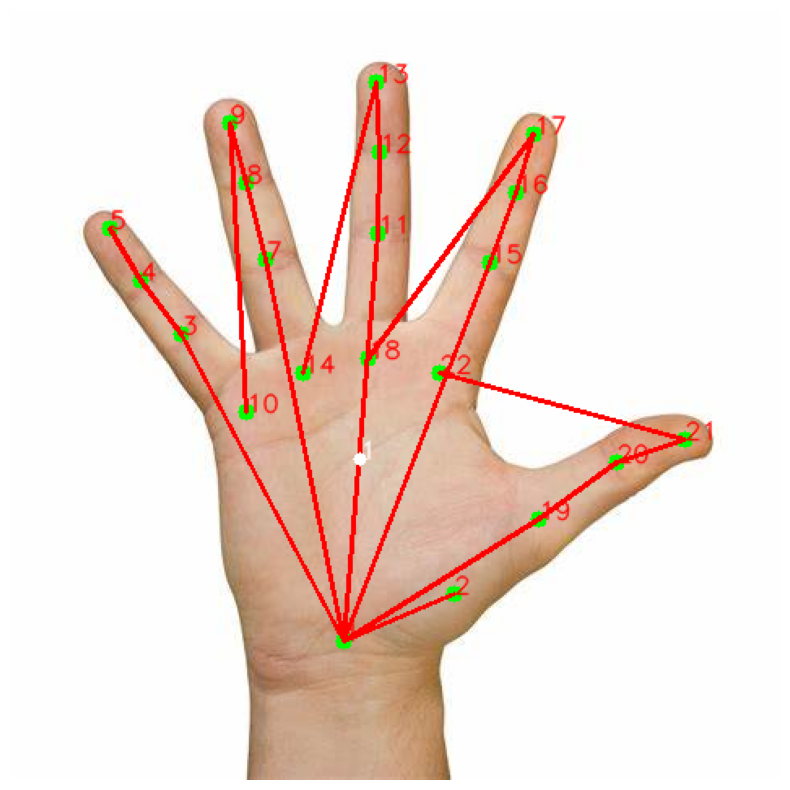

True

In [11]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 创建新的索引映射
index_mapping = {
    0: 1,   # 原1点变成新1点
    1: 2,   # 原2点变成新2点
    2: 19,  # 原3点变成新19点
    3: 20,  # 原4点变成新20点
    4: 21,  # 原5点变成新21点
    5: 22,  # 原6点变成新22点
    6: 15,  # 原7点变成新15点
    7: 16,  # 原8点变成新16点
    8: 17,  # 原9点变成新17点
    9: 18,  # 原10点变成新18点
    10: 11,  # 原11点变成新11点
    11: 12,  # 原12点变成新12点
    12: 13,  # 原13点变成新13点
    13: 14,  # 原14点变成新14点
    14: 7,   # 原15点变成新7点
    15: 8,   # 原16点变成新8点
    16: 9,   # 原17点变成新9点
    17: 10,  # 原18点变成新10点
    18: 3,   # 原19点变成新3点
    19: 4,   # 原20点变成新4点
    20: 5,   # 原21点变成新5点
    21: 6    # 原22点变成新6点
}

# 创建新的连接顺序
connections = [
   (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制关键点和连接线
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 打印坐标
            print(f'Landmark {idx + 1}: x={x}, y={y}, z={z}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 获取新的索引
            new_idx = index_mapping.get(idx, idx + 1)  # 默认使用原索引加1
            # 在图像上添加新的索引
            cv2.putText(image_rgb, f'{new_idx}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 绘制新的连接线
        for connection in connections:
            start_idx = connection[0] - 1
            end_idx = connection[1] - 1
            if start_idx < len(hand_landmarks.landmark) and end_idx < len(hand_landmarks.landmark):
                start = hand_landmarks.landmark[start_idx]
                end = hand_landmarks.landmark[end_idx]
                start_px = (int(start.x * w), int(start.y * h))
                end_px = (int(end.x * w), int(end.y * h))
                cv2.line(image_rgb, start_px, end_px, (255, 0, 0), 2)

        # 计算新的1号点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)

        # 计算新的1号点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1],
                                      hand_landmarks.landmark[i].y * image.shape[0]]
                                     for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 在图像上标记新的1号点
        cv2.putText(image_rgb, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制新的1号点
        cv2.circle(image_rgb, (center_x, center_y), 4, (255, 255, 255), -1)

        # 获取新的1号点的坐标
        landmark_1_x = center_x
        landmark_1_y = center_y
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


Landmark 1: x=0.43302443623542786, y=0.818848729133606, z=1.3965103562441072e-06
Landmark 2: x=0.5768869519233704, y=0.7579110860824585, z=-0.06282050162553787
Landmark 3: x=0.6866481900215149, y=0.6619820594787598, z=-0.09351545572280884
Landmark 4: x=0.7884937524795532, y=0.5874353647232056, z=-0.12168563157320023
Landmark 5: x=0.8758532404899597, y=0.5577382445335388, z=-0.15070241689682007
Landmark 6: x=0.5583635568618774, y=0.47163403034210205, z=-0.05463092401623726
Landmark 7: x=0.6224612593650818, y=0.32865941524505615, z=-0.08969682455062866
Landmark 8: x=0.6575682759284973, y=0.23685653507709503, z=-0.11669182032346725
Landmark 9: x=0.6797264218330383, y=0.161033034324646, z=-0.1382618248462677
Landmark 10: x=0.465442419052124, y=0.4530300796031952, z=-0.057180702686309814
Landmark 11: x=0.4781588912010193, y=0.29041600227355957, z=-0.08992395550012589
Landmark 12: x=0.4804042875766754, y=0.18361783027648926, z=-0.11966921389102936
Landmark 13: x=0.47522926330566406, y=0.0938

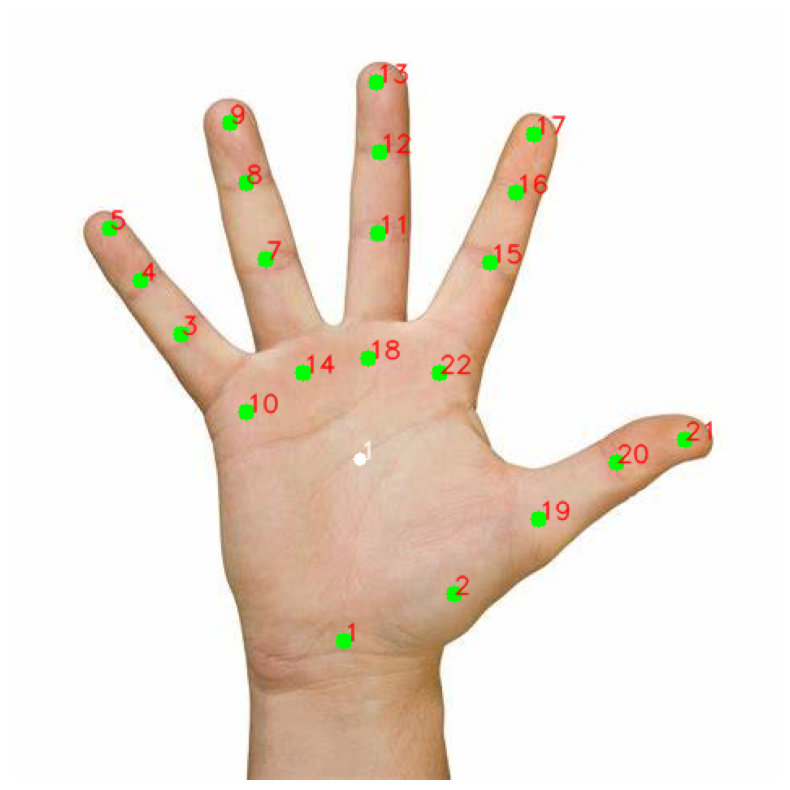

True

In [12]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
input_image_path = 'hand.jpg'  # 替换为你的图片路径
image = cv2.imread(input_image_path)

# 将图像颜色从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 处理图像，检测手部关键点
results = hands.process(image_rgb)

# 创建新的索引映射
index_mapping = {
    0: 1,   # 原1点变成新1点
    1: 2,   # 原2点变成新2点
    2: 19,  # 原3点变成新19点
    3: 20,  # 原4点变成新20点
    4: 21,  # 原5点变成新21点
    5: 22,  # 原6点变成新22点
    6: 15,  # 原7点变成新15点
    7: 16,  # 原8点变成新16点
    8: 17,  # 原9点变成新17点
    9: 18,  # 原10点变成新18点
    10: 11,  # 原11点变成新11点
    11: 12,  # 原12点变成新12点
    12: 13,  # 原13点变成新13点
    13: 14,  # 原14点变成新14点
    14: 7,   # 原15点变成新7点
    15: 8,   # 原16点变成新8点
    16: 9,   # 原17点变成新9点
    17: 10,  # 原18点变成新10点
    18: 3,   # 原19点变成新3点
    19: 4,   # 原20点变成新4点
    20: 5,   # 原21点变成新5点
    21: 6    # 原22点变成新6点
}

# 检测到手部关键点
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制关键点和新的索引
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取x, y, z坐标
            x = landmark.x
            y = landmark.y
            z = landmark.z

            # 打印坐标
            print(f'Landmark {idx + 1}: x={x}, y={y}, z={z}')

            # 将归一化坐标转换为图像中的像素坐标
            px = int(landmark.x * w)
            py = int(landmark.y * h)

            # 在图像上绘制关键点
            cv2.circle(image_rgb, (px, py), 5, (0, 255, 0), -1)

            # 获取新的索引
            new_idx = index_mapping.get(idx, idx + 1)  # 默认使用原索引加1
            # 在图像上添加新的索引
            cv2.putText(image_rgb, f'{new_idx}', (px, py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # 计算新的1号点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)

        # 计算新的1号点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1],
                                      hand_landmarks.landmark[i].y * image.shape[0]]
                                     for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 在图像上标记新的1号点
        cv2.putText(image_rgb, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制新的1号点
        cv2.circle(image_rgb, (center_x, center_y), 4, (255, 255, 255), -1)

        # 获取新的1号点的坐标
        landmark_1_x = center_x
        landmark_1_y = center_y
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 保存处理后的图像
output_image_path = 'hand_landmarks_with_params.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


In [26]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标
    landmark_1_x = int(center_x)
    landmark_1_y = int(center_y)
    landmark_1_z = center_landmarks_z_avg

    print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

# 保存处理后的图像到文件
cv2.imwrite('output_image9.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [22]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 定义连接顺序
connections = [
    (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制所有关键点
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * w)
            landmark_y = int(landmark.y * h)
            points.append((landmark_x, landmark_y))
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # 计算手心中心点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算手心中心点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * w, 
                                      hand_landmarks.landmark[i].y * h] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        # 在图像上标记手心中心点
        cv2.putText(image, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制手心中心点
        cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
        
        # 获取手心中心点的坐标
        landmark_1_x = int(center_x)
        landmark_1_y = int(center_y)
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

        # 将手心中心点加入点集中
        points.append((landmark_1_x, landmark_1_y))

        # 绘制新的连接线
        for connection in connections:
            start_idx = connection[0] - 1
            end_idx = connection[1] - 1
            if start_idx < len(points) and end_idx < len(points):
                start_point = points[start_idx]
                end_point = points[end_idx]
                cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output11_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [24]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 定义连接顺序 (基于新的映射索引)
connections = [
    (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制所有关键点
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * w)
            landmark_y = int(landmark.y * h)
            points.append((landmark_x, landmark_y))
            # 在图像上标记关键点索引
            cv2.putText(image, str(idx + 1), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # 计算手心中心点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算手心中心点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * w, 
                                      hand_landmarks.landmark[i].y * h] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        # 在图像上标记手心中心点
        cv2.putText(image, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制手心中心点
        cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
        
        # 获取手心中心点的坐标
        landmark_1_x = int(center_x)
        landmark_1_y = int(center_y)
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

        # 将手心中心点加入点集中
        points.append((landmark_1_x, landmark_1_y))

        # 绘制新的连接线
        for connection in connections:
            start_idx = connection[0] - 1 if connection[0] != 22 else 21  # 将 22 对应到索引 21
            end_idx = connection[1] - 1 if connection[1] != 22 else 21    # 将 22 对应到索引 21
            if start_idx < len(points) and end_idx < len(points):
                start_point = points[start_idx]
                end_point = points[end_idx]
                cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output13_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [28]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 定义连接顺序 (基于新的映射索引)
connections = [
    (1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 绘制所有关键点
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * w)
            landmark_y = int(landmark.y * h)
            points.append((landmark_x, landmark_y))
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # 计算手心中心点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算手心中心点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * w, 
                                      hand_landmarks.landmark[i].y * h] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        # 在图像上标记手心中心点
        cv2.putText(image, str(1), (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        # 在图像上绘制手心中心点
        cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
        
        # 获取手心中心点的坐标
        landmark_1_x = int(center_x)
        landmark_1_y = int(center_y)
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

        # 将手心中心点加入点集中
        points.append((landmark_1_x, landmark_1_y))

        # 绘制新的连接线
        ###
        """
        for connection in connections:
            if connection[0] == 1:
                start_idx = len(points) - 1  # 中心点索引
            else:
                start_idx = index_mapping[connection[0] - 1] - 1

            if connection[1] == 1:
                end_idx = len(points) - 1  # 中心点索引
            else:
                end_idx = index_mapping[connection[1] - 1] - 1

            if start_idx < len(points) and end_idx < len(points):
                start_point = points[start_idx]
                end_point = points[end_idx]
                cv2.line(image, start_point, end_point, (255, 0, 0), 2)
            """
        
# 保存处理后的图像到文件
cv2.imwrite('output16_image.jpg', image)


IndentationError: unexpected indent (1593157340.py, line 113)

In [30]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 定义连接顺序 (基于新的映射索引)
connections = [
    (1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # 获取图像尺寸
        h, w, _ = image.shape

        # 计算所有关键点的坐标
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * w)
            landmark_y = int(landmark.y * h)
            points.append((landmark_x, landmark_y))

        # 计算手心中心点的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算手心中心点的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * w, 
                                      hand_landmarks.landmark[i].y * h] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        
        # 获取手心中心点的坐标
        landmark_1_x = int(center_x)
        landmark_1_y = int(center_y)
        landmark_1_z = center_landmarks_z_avg

        print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

        # 将手心中心点加入点集中
        points.append((landmark_1_x, landmark_1_y))

        # 从1号点开始连接其他点
        for connection in connections:
            # 确定起始点索引
            if connection[0] == 1:
                start_idx = len(points) - 1  # 中心点索引
            else:
                start_idx = index_mapping[connection[0]] - 1

            # 确定终止点索引
            if connection[1] == 1:
                end_idx = len(points) - 1  # 中心点索引
            else:
                end_idx = index_mapping[connection[1]] - 1

            # 检查索引是否有效并绘制连接线
            if start_idx < len(points) and end_idx < len(points):
                start_point = points[start_idx]
                end_point = points[end_idx]
                cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output17_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [32]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 连接顺序
connections = [
    (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标
    landmark_1_x = int(center_x)
    landmark_1_y = int(center_y)
    landmark_1_z = center_landmarks_z_avg

    print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

    # 将新的1号点（中心点）加入到关键点列表中
    points = [(int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])) for landmark in hand_landmarks.landmark]
    points.append((landmark_1_x, landmark_1_y))

    # 按照连接顺序绘制线条
    for connection in connections:
        start_idx = connection[0] - 1 if connection[0] != 1 else len(points) - 1
        end_idx = connection[1] - 1 if connection[1] != 1 else len(points) - 1

        if start_idx < len(points) and end_idx < len(points):
            start_point = points[start_idx]
            end_point = points[end_idx]
            cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output18_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [33]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 连接顺序
connections = [
    (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        points = [(int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])) for landmark in hand_landmarks.landmark]

        # 计算新的1号点（中心点）的坐标平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                      hand_landmarks.landmark[i].y * image.shape[0]] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))

        # 获取手心中心点的坐标
        points.append((center_x, center_y))

        # 按照连接顺序绘制线条
        for start, end in connections:
            start_idx = start - 1 if start != 1 else len(points) - 1
            end_idx = end - 1 if end != 1 else len(points) - 1

            start_point = points[start_idx]
            end_point = points[end_idx]
            cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output19_image.jpg', image)


True

In [36]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            points.append((landmark_x, landmark_y))
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标
    points.append((center_x, center_y))

    # 只连接点2和点1
    start_idx = 2 - 1  # 新2号点对应的索引
    end_idx = len(points) - 1  # 新1号点（中心点）的索引

    if start_idx < len(points) and end_idx < len(points):
        start_point = points[start_idx]
        end_point = points[end_idx]
        cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output22_image.jpg', image)


True

In [55]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            points.append((landmark_x, landmark_y))
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标    points.append((center_x, center_y))


In [67]:
    points.append((center_x, center_y))

    # 获取新的2号点的索引并连接新的1号点和新的2号点
    start_idx = points[index_mapping[2] ]
    end_idx = points[-1]
    print(end_idx)

    cv2.line(image, start_idx, end_idx, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output23_image.jpg', image)

(215, 276)
18


True

In [57]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

# 连接顺序
connections = [
    (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9),
    (11, 1), (12, 11), (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17),
    (19, 1), (20, 19), (21, 20), (22, 21)
]

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标
    landmark_1_x = int(center_x)
    landmark_1_y = int(center_y)
    landmark_1_z = center_landmarks_z_avg

    print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")

    # 将新的1号点（中心点）加入到关键点列表中
    points = [(int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])) for landmark in hand_landmarks.landmark]
    points.append((landmark_1_x, landmark_1_y))

    # 按照连接顺序绘制线条并打印索引信息
    for connection in connections:
        start_idx = connection[0] - 1 if connection[0] != 1 else len(points) - 1
        end_idx = connection[1] - 1 if connection[1] != 1 else len(points) - 1

        if start_idx < len(points) and end_idx < len(points):
            start_point = points[start_idx]
            end_point = points[end_idx]
            print(f"Connection from point {start_idx + 1} ({start_point}) to point {end_idx + 1} ({end_point})")
            cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output24_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731
Connection from point 2 ((273, 359)) to point 22 ((215, 276))
Connection from point 3 ((325, 313)) to point 22 ((215, 276))
Connection from point 4 ((373, 278)) to point 3 ((325, 313))
Connection from point 5 ((415, 264)) to point 4 ((373, 278))
Connection from point 6 ((264, 223)) to point 5 ((415, 264))
Connection from point 7 ((295, 155)) to point 22 ((215, 276))
Connection from point 8 ((311, 112)) to point 7 ((295, 155))
Connection from point 9 ((322, 76)) to point 8 ((311, 112))
Connection from point 10 ((220, 214)) to point 9 ((322, 76))
Connection from point 11 ((226, 137)) to point 22 ((215, 276))
Connection from point 12 ((227, 87)) to point 11 ((226, 137))
Connection from point 13 ((225, 44)) to point 12 ((227, 87))
Connection from point 14 ((180, 223)) to point 13 ((225, 44))
Connection from point 15 ((157, 153)) to point 22 ((215, 276))
Connection from point 16 ((145, 106)) to point 15 ((157, 153))
Connection from point 17 ((13

True

In [65]:
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}
print(index_mapping[3])

20


In [63]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        points = []
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            points.append((landmark_x, landmark_y))
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    points.append((center_x, center_y))
    # 获取新的1号关键点的坐标
print(points[0])

(205, 388)


In [14]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 在图像上绘制手部中心点
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    
    # 获取新的1号关键点的坐标
    landmark_1_x = int(center_x)
    landmark_1_y = int(center_y)
    landmark_1_z = center_landmarks_z_avg

    print(f"Point 1: x={landmark_1_x}, y={landmark_1_y}, z={landmark_1_z}")
    if 2 in landmark_positions and 3 in landmark_positions:
        cv2.line(image, landmark_positions[2], landmark_positions[3], (0, 255, 0), 2)
    if 1 in landmark_positions and 2 in landmark_positions:
        cv2.line(image, landmark_positions[1], landmark_positions[2], (0, 255, 0), 2)



# 保存处理后的图像到文件
cv2.imwrite('output27_image.jpg', image)


Point 1: x=215, y=276, z=-0.05448034289423731


True

In [12]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
   1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

if results.multi_hand_landmarks:
    landmark_positions = {}  # 用于存储关键点的新索引和坐标
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            landmark_positions[new_idx] = (landmark_x, landmark_y)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
 # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(1), (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    # 连接新的1号和2号关键点
    if 2 in landmark_positions and 3 in landmark_positions:
        cv2.line(image, landmark_positions[2], landmark_positions[3], (0, 255, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output_hand_image.jpg', image)


True

In [15]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
   1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

landmark_positions = {}  # 存储关键点的索引和坐标

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            landmark_positions[new_idx] = (landmark_x, landmark_y)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点
    cv2.putText(image, str(22), (center_x, center_y),  # 22是新的1号点
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    landmark_positions[22] = (center_x, center_y)  # 添加新的1号点到字典

    # 连接新的1号和2号关键点
    if 22 in landmark_positions and 2 in landmark_positions:
        cv2.line(image, landmark_positions[22], landmark_positions[2], (0, 255, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output_hand_image.jpg', image)


True

In [25]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand02.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

landmark_positions = {}  # 存储关键点的索引和坐标
connections = [(1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9), (11, 1), (12, 11),
               (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17), (19, 1), (20, 19), (21, 20), (22, 21)]
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            landmark_positions[new_idx] = (landmark_x, landmark_y)
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            print(f"Original index {idx + 1} is now index {new_idx}")
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点（现在使用'1'而不是'22'）
    cv2.putText(image, '1', (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    landmark_positions[1] = (center_x, center_y)  # 修正索引映射错误，使用1而不是22

    for start_point, end_point in connections:
        if start_point in landmark_positions and end_point in landmark_positions:
            cv2.line(image, landmark_positions[start_point], landmark_positions[end_point], (0, 255, 0), 2)

# 保存处理后的图像到文件
cv2.imwrite('output30_hand_image.jpg', image)


Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Original index 10 is now index 11
Original index 11 is now index 12
Original index 12 is now index 13
Original index 13 is now index 14
Original index 14 is now index 7
Original index 15 is now index 8
Original index 16 is now index 9
Original index 17 is now index 10
Original index 18 is now index 3
Original index 19 is now index 4
Original index 20 is now index 5
Original index 21 is now index 6


True

In [28]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 读取输入图像
image = cv2.imread("hand02.jpg")

# 将图像颜色从BGR转换为RGB
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 创建新的索引映射
index_mapping = {
    1: 2,   # 原1点变成新2点
    2: 19,  # 原2点变成新19点
    3: 20,  # 原3点变成新20点
    4: 21,  # 原4点变成新21点
    5: 22,  # 原5点变成新22点
    6: 15,  # 原6点变成新15点
    7: 16,  # 原7点变成新16点
    8: 17,  # 原8点变成新17点
    9: 18,  # 原9点变成新18点
    10: 11, # 原10点变成新11点
    11: 12, # 原11点变成新12点
    12: 13, # 原12点变成新13点
    13: 14, # 原13点变成新14点
    14: 7,  # 原14点变成新7点
    15: 8,  # 原15点变成新8点
    16: 9,  # 原16点变成新9点
    17: 10, # 原17点变成新10点
    18: 3,  # 原18点变成新3点
    19: 4,  # 原19点变成新4点
    20: 5,  # 原20点变成新5点
    21: 6,  # 原21点变成新6点
    22: 1   # 原22点变成新1点
}

landmark_positions = {}  # 存储关键点的索引和坐标
connections = [(1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 5), (7, 1), (8, 7), (9, 8), (10, 9), (11, 1), (12, 11),
               (13, 12), (14, 13), (15, 1), (16, 15), (17, 16), (18, 17), (19, 1), (20, 19), (21, 20), (22, 21)]

landmark_positions = {}  # 存储关键点的索引和坐标
landmark_data = np.zeros((1, 1, 22, 6))  # 创建数组存储(x, y, z, 0, 0, 0)数据

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks)
        for idx, landmark in enumerate(hand_landmarks.landmark):
            # 获取关键点坐标
            landmark_x = int(landmark.x * image.shape[1])
            landmark_y = int(landmark.y * image.shape[0])
            z = landmark.z * image.shape[1]
            # 获取新的索引
            new_idx = index_mapping.get(idx + 1, idx + 1)
            landmark_positions[new_idx] = (landmark_x, landmark_y)
            landmark_data[0, 0, new_idx-1] = [landmark_x, landmark_y, z, 0, 0, 0]
            # 在图像上标记关键点索引
            cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            print(f"Original index {idx + 1} is now index {new_idx}")
    # 计算新的1号点（中心点）的z坐标的平均值
    center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
    center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
    center_landmarks_z_avg = np.mean(center_landmarks_z)
    
    # 计算新的1号点（中心点）的坐标平均值
    center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                  hand_landmarks.landmark[i].y * image.shape[0]] 
                                  for i in center_landmarks_indices])
    center_x = int(np.mean(center_landmarks[:, 0]))
    center_y = int(np.mean(center_landmarks[:, 1]))
    # 在图像上标记手部中心点（现在使用'1'而不是'22'）
    cv2.putText(image, '1', (center_x, center_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
    landmark_positions[1] = (center_x, center_y)  # 修正索引映射错误，使用1而不是22

    for start_point, end_point in connections:
        if start_point in landmark_positions and end_point in landmark_positions:
            cv2.line(image, landmark_positions[start_point], landmark_positions[end_point], (0, 255, 0), 2)
np.save('landmark_data.npy', landmark_data)
print("Landmark data saved to 'landmark_data.npy'.")
# 保存处理后的图像到文件
cv2.imwrite('output30_hand_image.jpg', image)


Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Original index 10 is now index 11
Original index 11 is now index 12
Original index 12 is now index 13
Original index 13 is now index 14
Original index 14 is now index 7
Original index 15 is now index 8
Original index 16 is now index 9
Original index 17 is now index 10
Original index 18 is now index 3
Original index 19 is now index 4
Original index 20 is now index 5
Original index 21 is now index 6
Landmark data saved to 'landmark_data.npy'.


True

In [29]:
import numpy as np

In [32]:
A=np.load("landmark_data.npy")
A.shape
print(A)

[[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 8.22000000e+02  1.00600000e+03  2.01703970e-03  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 6.43000000e+02  6.13000000e+02 -7.26870000e+01  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 5.51000000e+02  6.24000000e+02 -1.82196856e+02  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 5.47000000e+02  7.04000000e+02 -2.51419306e+02  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 5.70000000e+02  8.06000000e+02 -2.89579153e+02  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 7.50000000e+02  5.21000000e+02 -6.52720809e+01  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 6.78000000e+02  3.65000000e+02 -1.53920376e+02  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 6.43000000e+02  3.31000000e+02 -2.38478112e+02  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 6.19000000e+02  3.60000000e+02 -2.90220189e+02  0.

In [41]:
import cv2
import mediapipe as mp
import numpy as np
import os

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 设置图像文件夹路径和保存结果的文件夹路径
image_folder = "nie"
output_folder = "nie_output"

# 列出图像文件夹中的所有图像文件
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

all_landmark_data = []  # 存储所有图像的手部数据

for image_file in image_files:
    # 读取图像文件
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    
    # 将图像颜色从BGR转换为RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 进行手部检测
    results = hands.process(image_rgb)
    
    # 创建新的索引映射
    index_mapping = {
        1: 2,   # 原1点变成新2点
        2: 19,  # 原2点变成新19点
        3: 20,  # 原3点变成新20点
        4: 21,  # 原4点变成新21点
        5: 22,  # 原5点变成新22点
        6: 15,  # 原6点变成新15点
        7: 16,  # 原7点变成新16点
        8: 17,  # 原8点变成新17点
        9: 18,  # 原9点变成新18点
        10: 11, # 原10点变成新11点
        11: 12, # 原11点变成新12点
        12: 13, # 原12点变成新13点
        13: 14, # 原13点变成新14点
        14: 7,  # 原14点变成新7点
        15: 8,  # 原15点变成新8点
        16: 9,  # 原16点变成新9点
        17: 10, # 原17点变成新10点
        18: 3,  # 原18点变成新3点
        19: 4,  # 原19点变成新4点
        20: 5,  # 原20点变成新5点
        21: 6,  # 原21点变成新6点
        22: 1   # 原22点变成新1点
    }
    
    landmark_positions = {}  # 存储关键点的索引和坐标
    landmark_data = np.zeros((1, 1, 22, 6))  # 创建数组存储(x, y, z, 0, 0, 0)数据
    
    # 处理手部检测结果
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks)
            for idx, landmark in enumerate(hand_landmarks.landmark):
                # 获取关键点坐标
                landmark_x = int(landmark.x * image.shape[1])
                landmark_y = int(landmark.y * image.shape[0])
                z = landmark.z * image.shape[1]
                # 获取新的索引
                new_idx = index_mapping.get(idx + 1, idx + 1)
                landmark_positions[new_idx] = (landmark_x, landmark_y)
                landmark_data[0, 0, new_idx-1] = [landmark_x, landmark_y, z, 0, 0, 0]
                # 在图像上标记关键点索引
                cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                print(f"Original index {idx + 1} is now index {new_idx}")
        # 计算新的1号点（中心点）的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算新的1号点（中心点）的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                      hand_landmarks.landmark[i].y * image.shape[0]] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        # 在图像上标记手部中心点（现在使用'1'而不是'22'）
        cv2.putText(image, '1', (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
        landmark_positions[1] = (center_x, center_y)  # 修正索引映射错误，使用1而不是22

        for start_point, end_point in connections:
            if start_point in landmark_positions and end_point in landmark_positions:
                cv2.line(image, landmark_positions[start_point], landmark_positions[end_point], (0, 255, 0), 2)
        # 将当前图像的手部数据添加到总体数组中
        all_landmark_data.append(landmark_data)

    # 保存处理后的图像到文件夹中
    output_image_path = os.path.join(output_folder, f"output_{image_file}")
    cv2.imwrite(output_image_path, image)

# 将所有图像的手部数据保存为Numpy数组
all_landmark_data = np.array(all_landmark_data)

np.save(os.path.join(output_folder, "all_landmark_data.npy"), all_landmark_data)
print("All landmark data saved to 'all_landmark_data.npy'.")


Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Original index 10 is now index 11
Original index 11 is now index 12
Original index 12 is now index 13
Original index 13 is now index 14
Original index 14 is now index 7
Original index 15 is now index 8
Original index 16 is now index 9
Original index 17 is now index 10
Original index 18 is now index 3
Original index 19 is now index 4
Original index 20 is now index 5
Original index 21 is now index 6
Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Origina

In [43]:
import numpy as np
A=np.load("nie_output/all_landmark_data.npy")
print(A)

[[[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 4.29000000e+02  1.40200000e+03 -3.43981941e-05  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 5.89000000e+02  1.08300000e+03  3.23499792e+01  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    ...
    [ 1.86000000e+02  1.15500000e+03 -3.81621594e+01  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 1.46000000e+02  1.02400000e+03 -4.14290510e+01  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 1.78000000e+02  9.31000000e+02 -3.95238283e+01  0.00000000e+00
      0.00000000e+00  0.00000000e+00]]]]



 [[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 4.23000000e+02  1.41500000e+03  1.31936242e-04  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    [ 5.77000000e+02  1.09200000e+03  3.78604033e+01  0.00000000e+00
      0.00000000e+00  0.00000000e+00]
    ...
    [ 1.8500000

In [45]:
import pickle
import numpy as np

# 加载手势动作的数据
gesture_data = np.load('nie_output/all_landmark_data.npy')

# 加载保存有模型的Pickle文件
with open('best_action_model_state.pkl', 'rb') as file:
    model = pickle.load(file)

# 使用模型识别手势动作
predictions = model.predict(gesture_data)

# 输出识别结果
print("Predictions:")
print(predictions)


UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [48]:
import pickle
import numpy as np
M=np.load("best_action_model_state.pkl")
print(M)

In [93]:
gesture_data = np.load('nie_output/all_landmark_data.npy')
gesture_data.shape

(1, 6, 22, 6)

In [92]:
import cv2
import mediapipe as mp
import numpy as np
import os

# 初始化MediaPipe手部模块
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.75)

# 设置图像文件夹路径和保存结果的文件夹路径
image_folder = "nie"
output_folder = "nie_output"

# 列出图像文件夹中的所有图像文件
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

all_landmark_data = []  # 存储所有图像的手部数据

for image_file in image_files:
    # 读取图像文件
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    
    # 将图像颜色从BGR转换为RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 进行手部检测
    results = hands.process(image_rgb)
    
    # 创建新的索引映射
    index_mapping = {
        1: 2,   # 原1点变成新2点
        2: 19,  # 原2点变成新19点
        3: 20,  # 原3点变成新20点
        4: 21,  # 原4点变成新21点
        5: 22,  # 原5点变成新22点
        6: 15,  # 原6点变成新15点
        7: 16,  # 原7点变成新16点
        8: 17,  # 原8点变成新17点
        9: 18,  # 原9点变成新18点
        10: 11, # 原10点变成新11点
        11: 12, # 原11点变成新12点
        12: 13, # 原12点变成新13点
        13: 14, # 原13点变成新14点
        14: 7,  # 原14点变成新7点
        15: 8,  # 原15点变成新8点
        16: 9,  # 原16点变成新9点
        17: 10, # 原17点变成新10点
        18: 3,  # 原18点变成新3点
        19: 4,  # 原19点变成新4点
        20: 5,  # 原20点变成新5点
        21: 6,  # 原21点变成新6点
        22: 1   # 原22点变成新1点
    }
    
    landmark_positions = {}  # 存储关键点的索引和坐标
    landmark_data = np.zeros((22, 6))  # 创建数组存储(x, y, z, 0, 0, 0)数据
    
    # 处理手部检测结果
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks)
            for idx, landmark in enumerate(hand_landmarks.landmark):
                # 获取关键点坐标
                landmark_x = int(landmark.x * image.shape[1])
                landmark_y = int(landmark.y * image.shape[0])
                z = landmark.z * image.shape[1]
                # 获取新的索引
                new_idx = index_mapping.get(idx + 1, idx + 1)
                landmark_positions[new_idx] = (landmark_x, landmark_y)
                landmark_data[new_idx-1] = [landmark_x, landmark_y, z, 0, 0, 0]
                # 在图像上标记关键点索引
                cv2.putText(image, str(new_idx), (landmark_x, landmark_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                print(f"Original index {idx + 1} is now index {new_idx}")
        # 计算新的1号点（中心点）的z坐标的平均值
        center_landmarks_indices = [0, 1, 5, 9, 13, 17]  # 原1, 2, 6, 10, 14, 18号点
        center_landmarks_z = [hand_landmarks.landmark[i].z for i in center_landmarks_indices]
        center_landmarks_z_avg = np.mean(center_landmarks_z)
        
        # 计算新的1号点（中心点）的坐标平均值
        center_landmarks = np.array([[hand_landmarks.landmark[i].x * image.shape[1], 
                                      hand_landmarks.landmark[i].y * image.shape[0]] 
                                      for i in center_landmarks_indices])
        center_x = int(np.mean(center_landmarks[:, 0]))
        center_y = int(np.mean(center_landmarks[:, 1]))
        # 在图像上标记手部中心点（现在使用'1'而不是'22'）
        cv2.putText(image, '1', (center_x, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.circle(image, (center_x, center_y), 4, (255, 255, 255), -1)
        landmark_positions[1] = (center_x, center_y)  # 修正索引映射错误，使用1而不是22

        for start_point, end_point in connections:
            if start_point in landmark_positions and end_point in landmark_positions:
                cv2.line(image, landmark_positions[start_point], landmark_positions[end_point], (0, 255, 0), 2)
        # 将当前图像的手部数据添加到总体数组中
        all_landmark_data.append(landmark_data)

    # 保存处理后的图像到文件夹中
    output_image_path = os.path.join(output_folder, f"output_{image_file}")
    cv2.imwrite(output_image_path, image)

# 将所有图像的手部数据保存为Numpy数组
all_landmark_data = np.array(all_landmark_data)
all_landmark_data = np.expand_dims(all_landmark_data, axis=0)  # 添加一个新的维度表示图像数量

np.save(os.path.join(output_folder, "all_landmark_data.npy"), all_landmark_data)
print("All landmark data saved to 'all_landmark_data.npy'.")


Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Original index 10 is now index 11
Original index 11 is now index 12
Original index 12 is now index 13
Original index 13 is now index 14
Original index 14 is now index 7
Original index 15 is now index 8
Original index 16 is now index 9
Original index 17 is now index 10
Original index 18 is now index 3
Original index 19 is now index 4
Original index 20 is now index 5
Original index 21 is now index 6
Original index 1 is now index 2
Original index 2 is now index 19
Original index 3 is now index 20
Original index 4 is now index 21
Original index 5 is now index 22
Original index 6 is now index 15
Original index 7 is now index 16
Original index 8 is now index 17
Original index 9 is now index 18
Origina

In [133]:
!python 1.py

顺时针旋转
